In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from utils import plot_decision_boundary, sigmoid, load_planar_dataset

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [2]:
# Data analysis

X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)

(2, 400)
(1, 400)


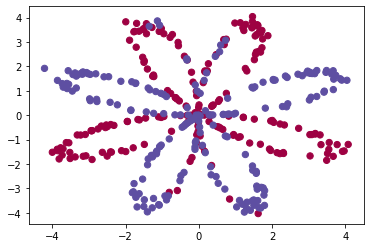

In [3]:
# Visualize the data

plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

In [4]:
shape_X = X.shape
shape_Y = Y.shape
m = X[1].shape  # training set size

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [5]:
# Train the simple logistic regression classifier using sklearn

clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

/home/ihor/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


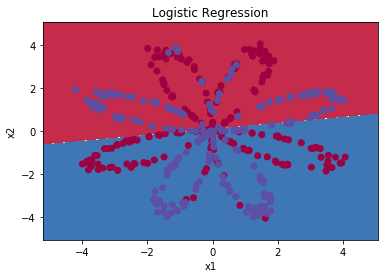

In [6]:
# Plot the decision boundary for logistic regression

plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [7]:
# layer sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_hid -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer
    n_hid = 4
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_hid, n_y)

In [8]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_hid, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_hid = " + str(n_hid))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_hid = 4
The size of the output layer is: n_y = 2


In [9]:
# initializing parameters

def initialize_parameters(n_x, n_hid, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_hid -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_hid, n_x)
                    b1 -- bias vector of shape (n_hid, 1)
                    W2 -- weight matrix of shape (n_y, n_hid)
                    b2 -- bias vector of shape (n_y, 1)
    """    
    
    W1 = np.random.randn(n_hid, n_x) * 0.01
    b1 = np.zeros((n_hid, 1))
    W2 = np.random.randn(n_y, n_hid) * 0.01
    b2 = np.zeros((n_y, 1))
        
    assert (W1.shape == (n_hid, n_x))
    assert (b1.shape == (n_hid, 1))
    assert (W2.shape == (n_y, n_hid))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
n_x, n_hid, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_hid, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01144724  0.00901591]
 [ 0.00502494  0.00900856]
 [-0.00683728 -0.0012289 ]
 [-0.00935769 -0.00267888]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00530355 -0.00691661 -0.00396754 -0.00687173]]
b2 = [[0.]]


In [11]:
# forward propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
        
    # Implement Forward Propagation to calculate A2 (probabilities)    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
        
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [12]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


In [13]:
# computation of cost function

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = (-1/m) * np.sum(logprobs)    
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [14]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [15]:
# backward propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters"    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
            
    # Retrieve also A1 and A2 from dictionary "cache"    
    A1 = cache["A1"]
    A2 = cache["A2"]
        
    # Backward propagation: calculate dW1, db1, dW2, db2    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)    
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [17]:
# update of parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
        
    # Retrieve each gradient from the dictionary "grads"    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
        
    # Update rule for each parameter   
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
        
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [19]:
# NN model

def nn_model(X, Y, n_hid, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_hid -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.    """
    
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters    
    parameters = initialize_parameters(n_x, n_hid, n_y)
        
    # Loop (gradient descent)

    for i in range(0, num_iterations):
                 
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters"
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [20]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.693084
Cost after iteration 1000: 0.000217
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023
W1 = [[-0.77804694  1.43766925]
 [-0.62254251  1.14275004]
 [-0.64615563  1.20452464]
 [-0.73479062  1.34950487]]
b1 = [[0.37058188]
 [0.26244635]
 [0.28679993]
 [0.34009529]]
W2 = [[-3.48791821 -2.17403916 -2.393282   -3.04416918]]
b2 = [[0.21161796]]


In [21]:
# prediction

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
        
    return predictions

In [22]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693145
Cost after iteration 1000: 0.287916
Cost after iteration 2000: 0.252237
Cost after iteration 3000: 0.233550
Cost after iteration 4000: 0.226677
Cost after iteration 5000: 0.222579
Cost after iteration 6000: 0.219684
Cost after iteration 7000: 0.217465
Cost after iteration 8000: 0.219426
Cost after iteration 9000: 0.218595


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

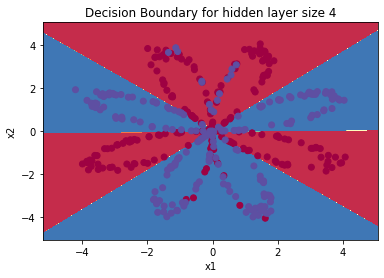

In [23]:
# Build a model with a n_hid-dimensional hidden layer
parameters = nn_model(X, Y, n_hid = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [24]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 90.75 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %


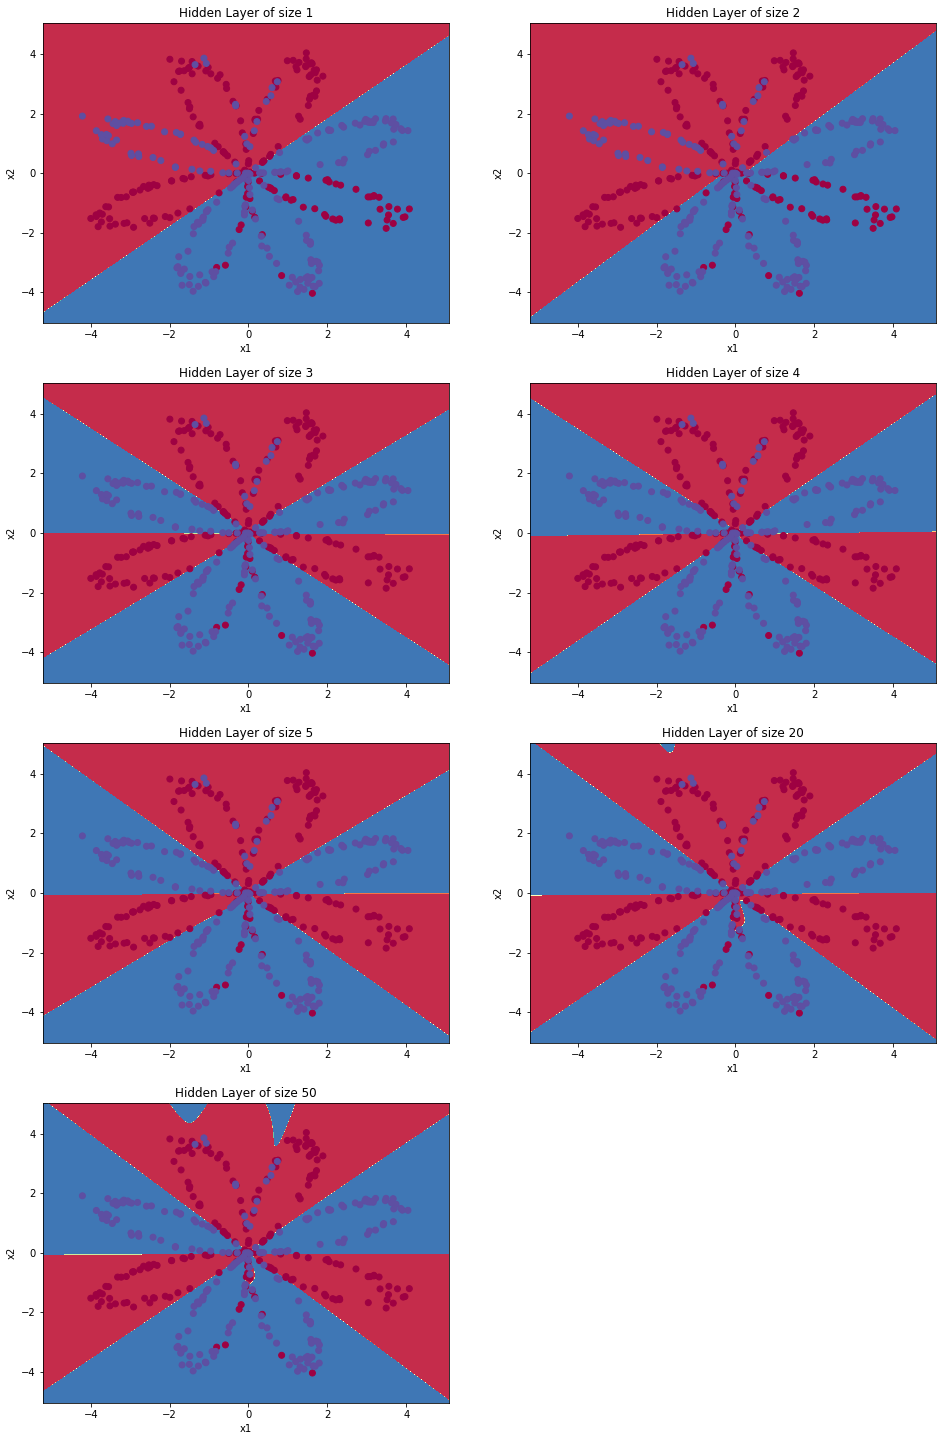

In [25]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

In [26]:
# Using tensorflow for solving this problem

from tensorflow.keras import layers, models, optimizers

hidden_size = 4
output_size = 1

model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='tanh'))
model.add(layers.Dense(output_size, activation='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(learning_rate=0.05), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
NUM_EPOCHS = 1000

model.fit(X.T, Y.T, epochs = NUM_EPOCHS, verbose=2)

Train on 400 samples
Epoch 1/1000
400/400 - 2s - loss: 0.6887 - accuracy: 0.5250
Epoch 2/1000
400/400 - 0s - loss: 0.5986 - accuracy: 0.7675
Epoch 3/1000
400/400 - 0s - loss: 0.5103 - accuracy: 0.8375
Epoch 4/1000
400/400 - 0s - loss: 0.4566 - accuracy: 0.8475
Epoch 5/1000
400/400 - 0s - loss: 0.4200 - accuracy: 0.8500
Epoch 6/1000
400/400 - 0s - loss: 0.3984 - accuracy: 0.8450
Epoch 7/1000
400/400 - 0s - loss: 0.3798 - accuracy: 0.8500
Epoch 8/1000
400/400 - 0s - loss: 0.3757 - accuracy: 0.8475
Epoch 9/1000
400/400 - 0s - loss: 0.3597 - accuracy: 0.8575
Epoch 10/1000
400/400 - 0s - loss: 0.3540 - accuracy: 0.8575
Epoch 11/1000
400/400 - 0s - loss: 0.3558 - accuracy: 0.8450
Epoch 12/1000
400/400 - 0s - loss: 0.3440 - accuracy: 0.8675
Epoch 13/1000
400/400 - 0s - loss: 0.3418 - accuracy: 0.8750
Epoch 14/1000
400/400 - 0s - loss: 0.3400 - accuracy: 0.8575
Epoch 15/1000
400/400 - 0s - loss: 0.3363 - accuracy: 0.8650
Epoch 16/1000
400/400 - 0s - loss: 0.3276 - accuracy: 0.8725
Epoch 17/100

Epoch 135/1000
400/400 - 0s - loss: 0.2754 - accuracy: 0.9000
Epoch 136/1000
400/400 - 0s - loss: 0.2746 - accuracy: 0.8850
Epoch 137/1000
400/400 - 0s - loss: 0.2756 - accuracy: 0.8900
Epoch 138/1000
400/400 - 0s - loss: 0.2761 - accuracy: 0.8975
Epoch 139/1000
400/400 - 0s - loss: 0.2755 - accuracy: 0.8975
Epoch 140/1000
400/400 - 0s - loss: 0.2748 - accuracy: 0.8925
Epoch 141/1000
400/400 - 0s - loss: 0.2775 - accuracy: 0.8875
Epoch 142/1000
400/400 - 0s - loss: 0.2724 - accuracy: 0.9025
Epoch 143/1000
400/400 - 0s - loss: 0.2726 - accuracy: 0.8975
Epoch 144/1000
400/400 - 0s - loss: 0.2777 - accuracy: 0.8975
Epoch 145/1000
400/400 - 0s - loss: 0.2708 - accuracy: 0.8975
Epoch 146/1000
400/400 - 0s - loss: 0.2718 - accuracy: 0.8975
Epoch 147/1000
400/400 - 0s - loss: 0.2802 - accuracy: 0.8850
Epoch 148/1000
400/400 - 0s - loss: 0.2712 - accuracy: 0.8975
Epoch 149/1000
400/400 - 0s - loss: 0.2769 - accuracy: 0.8950
Epoch 150/1000
400/400 - 0s - loss: 0.2754 - accuracy: 0.8900
Epoch 15

400/400 - 0s - loss: 0.2602 - accuracy: 0.9000
Epoch 268/1000
400/400 - 0s - loss: 0.2713 - accuracy: 0.8875
Epoch 269/1000
400/400 - 0s - loss: 0.2658 - accuracy: 0.9000
Epoch 270/1000
400/400 - 0s - loss: 0.2636 - accuracy: 0.8975
Epoch 271/1000
400/400 - 0s - loss: 0.2643 - accuracy: 0.8975
Epoch 272/1000
400/400 - 0s - loss: 0.2645 - accuracy: 0.8925
Epoch 273/1000
400/400 - 0s - loss: 0.2685 - accuracy: 0.8925
Epoch 274/1000
400/400 - 0s - loss: 0.2694 - accuracy: 0.9000
Epoch 275/1000
400/400 - 0s - loss: 0.2631 - accuracy: 0.9050
Epoch 276/1000
400/400 - 0s - loss: 0.2693 - accuracy: 0.9000
Epoch 277/1000
400/400 - 0s - loss: 0.2687 - accuracy: 0.8925
Epoch 278/1000
400/400 - 0s - loss: 0.2665 - accuracy: 0.9000
Epoch 279/1000
400/400 - 0s - loss: 0.2637 - accuracy: 0.9050
Epoch 280/1000
400/400 - 0s - loss: 0.2624 - accuracy: 0.8925
Epoch 281/1000
400/400 - 0s - loss: 0.2668 - accuracy: 0.9050
Epoch 282/1000
400/400 - 0s - loss: 0.2682 - accuracy: 0.9025
Epoch 283/1000
400/400 

Epoch 400/1000
400/400 - 0s - loss: 0.2640 - accuracy: 0.9025
Epoch 401/1000
400/400 - 0s - loss: 0.2626 - accuracy: 0.9050
Epoch 402/1000
400/400 - 0s - loss: 0.2585 - accuracy: 0.9050
Epoch 403/1000
400/400 - 0s - loss: 0.2663 - accuracy: 0.9000
Epoch 404/1000
400/400 - 0s - loss: 0.2613 - accuracy: 0.9025
Epoch 405/1000
400/400 - 0s - loss: 0.2645 - accuracy: 0.8975
Epoch 406/1000
400/400 - 0s - loss: 0.2588 - accuracy: 0.9050
Epoch 407/1000
400/400 - 0s - loss: 0.2636 - accuracy: 0.9125
Epoch 408/1000
400/400 - 0s - loss: 0.2613 - accuracy: 0.9050
Epoch 409/1000
400/400 - 0s - loss: 0.2626 - accuracy: 0.9075
Epoch 410/1000
400/400 - 0s - loss: 0.2605 - accuracy: 0.9075
Epoch 411/1000
400/400 - 0s - loss: 0.2635 - accuracy: 0.9000
Epoch 412/1000
400/400 - 0s - loss: 0.2587 - accuracy: 0.9025
Epoch 413/1000
400/400 - 0s - loss: 0.2629 - accuracy: 0.8975
Epoch 414/1000
400/400 - 0s - loss: 0.2654 - accuracy: 0.9000
Epoch 415/1000
400/400 - 0s - loss: 0.2649 - accuracy: 0.9050
Epoch 41

400/400 - 0s - loss: 0.2598 - accuracy: 0.9100
Epoch 533/1000
400/400 - 0s - loss: 0.2599 - accuracy: 0.9050
Epoch 534/1000
400/400 - 0s - loss: 0.2572 - accuracy: 0.9100
Epoch 535/1000
400/400 - 0s - loss: 0.2613 - accuracy: 0.9100
Epoch 536/1000
400/400 - 0s - loss: 0.2716 - accuracy: 0.9025
Epoch 537/1000
400/400 - 0s - loss: 0.2583 - accuracy: 0.9075
Epoch 538/1000
400/400 - 0s - loss: 0.2590 - accuracy: 0.9025
Epoch 539/1000
400/400 - 0s - loss: 0.2561 - accuracy: 0.9075
Epoch 540/1000
400/400 - 0s - loss: 0.2595 - accuracy: 0.8950
Epoch 541/1000
400/400 - 0s - loss: 0.2592 - accuracy: 0.9100
Epoch 542/1000
400/400 - 0s - loss: 0.2639 - accuracy: 0.9125
Epoch 543/1000
400/400 - 0s - loss: 0.2628 - accuracy: 0.9075
Epoch 544/1000
400/400 - 0s - loss: 0.2647 - accuracy: 0.9000
Epoch 545/1000
400/400 - 0s - loss: 0.2596 - accuracy: 0.9100
Epoch 546/1000
400/400 - 0s - loss: 0.2558 - accuracy: 0.9125
Epoch 547/1000
400/400 - 0s - loss: 0.2587 - accuracy: 0.9050
Epoch 548/1000
400/400 

Epoch 665/1000
400/400 - 0s - loss: 0.2586 - accuracy: 0.9050
Epoch 666/1000
400/400 - 0s - loss: 0.2622 - accuracy: 0.9100
Epoch 667/1000
400/400 - 0s - loss: 0.2567 - accuracy: 0.9050
Epoch 668/1000
400/400 - 0s - loss: 0.2577 - accuracy: 0.9050
Epoch 669/1000
400/400 - 0s - loss: 0.2599 - accuracy: 0.9025
Epoch 670/1000
400/400 - 0s - loss: 0.2606 - accuracy: 0.9100
Epoch 671/1000
400/400 - 0s - loss: 0.2592 - accuracy: 0.9125
Epoch 672/1000
400/400 - 0s - loss: 0.2661 - accuracy: 0.9075
Epoch 673/1000
400/400 - 0s - loss: 0.2614 - accuracy: 0.9075
Epoch 674/1000
400/400 - 0s - loss: 0.2575 - accuracy: 0.9075
Epoch 675/1000
400/400 - 0s - loss: 0.2566 - accuracy: 0.9100
Epoch 676/1000
400/400 - 0s - loss: 0.2558 - accuracy: 0.9100
Epoch 677/1000
400/400 - 0s - loss: 0.2586 - accuracy: 0.9025
Epoch 678/1000
400/400 - 0s - loss: 0.2593 - accuracy: 0.9050
Epoch 679/1000
400/400 - 0s - loss: 0.2553 - accuracy: 0.9175
Epoch 680/1000
400/400 - 0s - loss: 0.2602 - accuracy: 0.8975
Epoch 68

400/400 - 0s - loss: 0.2541 - accuracy: 0.9100
Epoch 798/1000
400/400 - 0s - loss: 0.2607 - accuracy: 0.9050
Epoch 799/1000
400/400 - 0s - loss: 0.2584 - accuracy: 0.9150
Epoch 800/1000
400/400 - 0s - loss: 0.2598 - accuracy: 0.9025
Epoch 801/1000
400/400 - 0s - loss: 0.2580 - accuracy: 0.9075
Epoch 802/1000
400/400 - 0s - loss: 0.2580 - accuracy: 0.9125
Epoch 803/1000
400/400 - 0s - loss: 0.2552 - accuracy: 0.9125
Epoch 804/1000
400/400 - 0s - loss: 0.2593 - accuracy: 0.9075
Epoch 805/1000
400/400 - 0s - loss: 0.2554 - accuracy: 0.9025
Epoch 806/1000
400/400 - 0s - loss: 0.2564 - accuracy: 0.9075
Epoch 807/1000
400/400 - 0s - loss: 0.2579 - accuracy: 0.9050
Epoch 808/1000
400/400 - 0s - loss: 0.2606 - accuracy: 0.9025
Epoch 809/1000
400/400 - 0s - loss: 0.2555 - accuracy: 0.9050
Epoch 810/1000
400/400 - 0s - loss: 0.2579 - accuracy: 0.9075
Epoch 811/1000
400/400 - 0s - loss: 0.2558 - accuracy: 0.9150
Epoch 812/1000
400/400 - 0s - loss: 0.2578 - accuracy: 0.9075
Epoch 813/1000
400/400 

Epoch 930/1000
400/400 - 0s - loss: 0.2599 - accuracy: 0.9025
Epoch 931/1000
400/400 - 0s - loss: 0.2603 - accuracy: 0.9000
Epoch 932/1000
400/400 - 0s - loss: 0.2534 - accuracy: 0.9075
Epoch 933/1000
400/400 - 0s - loss: 0.2603 - accuracy: 0.8950
Epoch 934/1000
400/400 - 0s - loss: 0.2584 - accuracy: 0.9125
Epoch 935/1000
400/400 - 0s - loss: 0.2581 - accuracy: 0.9050
Epoch 936/1000
400/400 - 0s - loss: 0.2538 - accuracy: 0.9050
Epoch 937/1000
400/400 - 0s - loss: 0.2572 - accuracy: 0.9050
Epoch 938/1000
400/400 - 0s - loss: 0.2551 - accuracy: 0.9125
Epoch 939/1000
400/400 - 0s - loss: 0.2542 - accuracy: 0.9050
Epoch 940/1000
400/400 - 0s - loss: 0.2584 - accuracy: 0.9075
Epoch 941/1000
400/400 - 0s - loss: 0.2576 - accuracy: 0.9075
Epoch 942/1000
400/400 - 0s - loss: 0.2576 - accuracy: 0.9000
Epoch 943/1000
400/400 - 0s - loss: 0.2575 - accuracy: 0.9025
Epoch 944/1000
400/400 - 0s - loss: 0.2577 - accuracy: 0.8950
Epoch 945/1000
400/400 - 0s - loss: 0.2562 - accuracy: 0.9025
Epoch 94

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  12        
_________________________________________________________________
dense_1 (Dense)              multiple                  5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [29]:
train_loss, train_accuracy = model.evaluate(X.T, Y.T)

400/400 [==============================] - 0s 930us/sample - loss: 0.2519 - accuracy: 0.9125


In [30]:
print('Train loss: {0:.2f}. Train accuracy: {1:.2f}%'.format(train_loss, train_accuracy * 100))

Train loss: 0.25. Train accuracy: 91.25%
